# 1. Introduction

Lending Club

# 2. Data Preprocessing

### 2.1 Data Read

In [124]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv("../input/lending-club-loan-dataset/loan.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [96]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
def check_shape(df):
    rows = df.shape[0]
    cols = df.shape[1]
    print(" Number of Records: ",rows)
    print(" Number of Columns: ",cols)

In [98]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  int64  
 3   funded_amnt                  887379 non-null  int64  
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [100]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


### 2.3 Missing Value Treatment

In [101]:
df.isna().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64

In [102]:
check_shape(df)

 Number of Records:  887379
 Number of Columns:  74


In [103]:
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null.rename(columns={'index':'Column'},inplace=True)

In [104]:
#df_null.sort_values(by='% Null',ascending=False)['% Null']>=30
drop_cols = df_null[df_null['% Null']>=20].sort_values(by='% Null',ascending=False)['Column'].tolist()
drop_cols

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'il_util',
 'mths_since_rcnt_il',
 'open_il_24m',
 'total_bal_il',
 'total_cu_tl',
 'inq_fi',
 'all_util',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'inq_last_12m',
 'open_il_12m',
 'open_il_6m',
 'open_acc_6m',
 'desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_last_delinq',
 'next_pymnt_d']

In [105]:
df.drop(labels=drop_cols,axis=1, inplace=True)

In [106]:
df_null2 = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null2.rename(columns={'index':'Column'},inplace=True)
df_null2.sort_values(by='% Null',ascending=False)

,Column,% Null
51,total_rev_hi_lim,7.92
50,tot_cur_bal,7.92
49,tot_coll_amt,7.92
10,emp_title,5.80
11,emp_length,5.05
42,last_pymnt_d,1.99
30,revol_util,0.06
20,title,0.02
45,collections_12_mths_ex_med,0.02
44,last_credit_pull_d,0.01


In [107]:
check_shape(df)

 Number of Records:  887379
 Number of Columns:  52


In [108]:
# dropping rows where missing values
df.dropna(axis=0, inplace=True)

In [109]:
check_shape(df)

 Number of Records:  752938
 Number of Columns:  52


In [110]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,10149342,12000897,27050,27050,27050.0,36 months,10.99,885.46,B,B2,...,Jan-16,885.46,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,10159584,12011200,9750,9750,9750.0,36 months,13.98,333.14,C,C1,...,Jan-16,333.14,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42537,10159498,1319523,12000,12000,12000.0,36 months,6.62,368.45,A,A2,...,Jan-16,368.45,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42538,10139658,11991209,12000,12000,12000.0,36 months,13.53,407.40,B,B5,...,Sep-15,119.17,Jan-16,0.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42539,10159548,12011167,15000,15000,15000.0,36 months,8.90,476.30,A,A5,...,Jan-16,476.30,Jan-16,0.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0


In [111]:
numeric_cols = df.select_dtypes(['int','float']).columns.tolist()
numeric_cols

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [112]:
obje_cols = df.select_dtypes(np.object).columns.tolist()
obje_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [113]:
df_num = df[numeric_cols[:16]]
df_num.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,7.529380e+05,7.529380e+05,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,7.529380e+05,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,7.529380e+05,752938.000000,752938.00000
mean,3.452995e+07,3.722536e+07,15156.353312,15156.345708,15150.010022,13.312015,447.374249,7.674135e+04,18.386580,0.331504,0.671420,11.778436,0.200299,1.728738e+04,55.556253,25.59931
std,2.141703e+07,2.253547e+07,8443.923126,8443.923526,8440.630553,4.411928,244.102988,6.592753e+04,8.286554,0.888108,0.959545,5.359415,0.593268,2.270638e+04,23.442118,11.85340
min,5.670500e+04,7.082500e+04,1000.000000,1000.000000,925.000000,5.320000,23.260000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.00000
25%,1.264568e+07,1.457781e+07,8800.000000,8800.000000,8800.000000,9.990000,269.980000,4.750000e+04,12.160000,0.000000,0.000000,8.000000,0.000000,6.691000e+03,38.400000,17.00000
50%,3.817114e+07,4.094535e+07,14000.000000,14000.000000,14000.000000,12.990000,392.810000,6.500000e+04,17.890000,0.000000,0.000000,11.000000,0.000000,1.218000e+04,56.400000,24.00000
75%,5.515089e+07,5.872080e+07,20000.000000,20000.000000,20000.000000,16.290000,585.117500,9.100000e+04,24.250000,0.000000,1.000000,15.000000,0.000000,2.126500e+04,73.700000,32.00000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,380.530000,39.000000,8.000000,90.000000,86.000000,2.904836e+06,892.300000,169.00000


In [114]:
df_num = df[numeric_cols[16:]]
df_num.describe()

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.0,752938.000000,7.529380e+05,7.529380e+05,7.529380e+05
mean,9091.243933,9087.654092,7327.321646,7324.047924,5541.790534,1744.915657,0.329850,40.285607,4.309378,2188.976002,0.015465,1.0,0.005448,2.212812e+02,1.418004e+05,3.216146e+04
std,8491.856233,8488.419806,7604.631877,7600.823287,6477.238454,2019.064305,3.737527,373.316613,53.085125,4890.464820,0.139431,0.0,0.081243,1.072247e+04,1.546332e+05,3.779435e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,926.872500,926.512500,1933.797500,1933.365000,1208.057500,461.560000,0.000000,0.000000,0.000000,298.170000,0.000000,1.0,0.000000,0.000000e+00,3.094725e+04,1.410000e+04
50%,7542.860000,7537.530000,4705.780000,4704.610000,3049.170000,1087.355000,0.000000,0.000000,0.000000,471.370000,0.000000,1.0,0.000000,0.000000e+00,8.354700e+04,2.390000e+04
75%,14337.010000,14328.622500,10180.160000,10175.297500,7370.457500,2234.330000,0.000000,0.000000,0.000000,808.540000,0.000000,1.0,0.000000,0.000000e+00,2.114110e+05,3.990000e+04
max,49372.860000,49372.860000,56087.909920,56047.850000,35000.000000,21840.000000,358.680000,33520.270000,5694.093600,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [115]:
l = ['id','member_id','dti','delinq_2yrs','inq_last_6mths','pub_rec','policy_code']
num_cols = numeric_cols
for x in l:
    num_cols.remove(x)

In [127]:
len(num_cols)

25

In [116]:
num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [146]:
def plot_box(cols_list):
    plt.figure(figsize=[20,20])
    i=1
    for col in cols_list:
        plt.subplot(5,5,i)
        sns.boxplot(df[col],orient='h')
        plt.title("Box plot for {}".format(col))
        i+=1
        plt.tight_layout()
    plt.show()

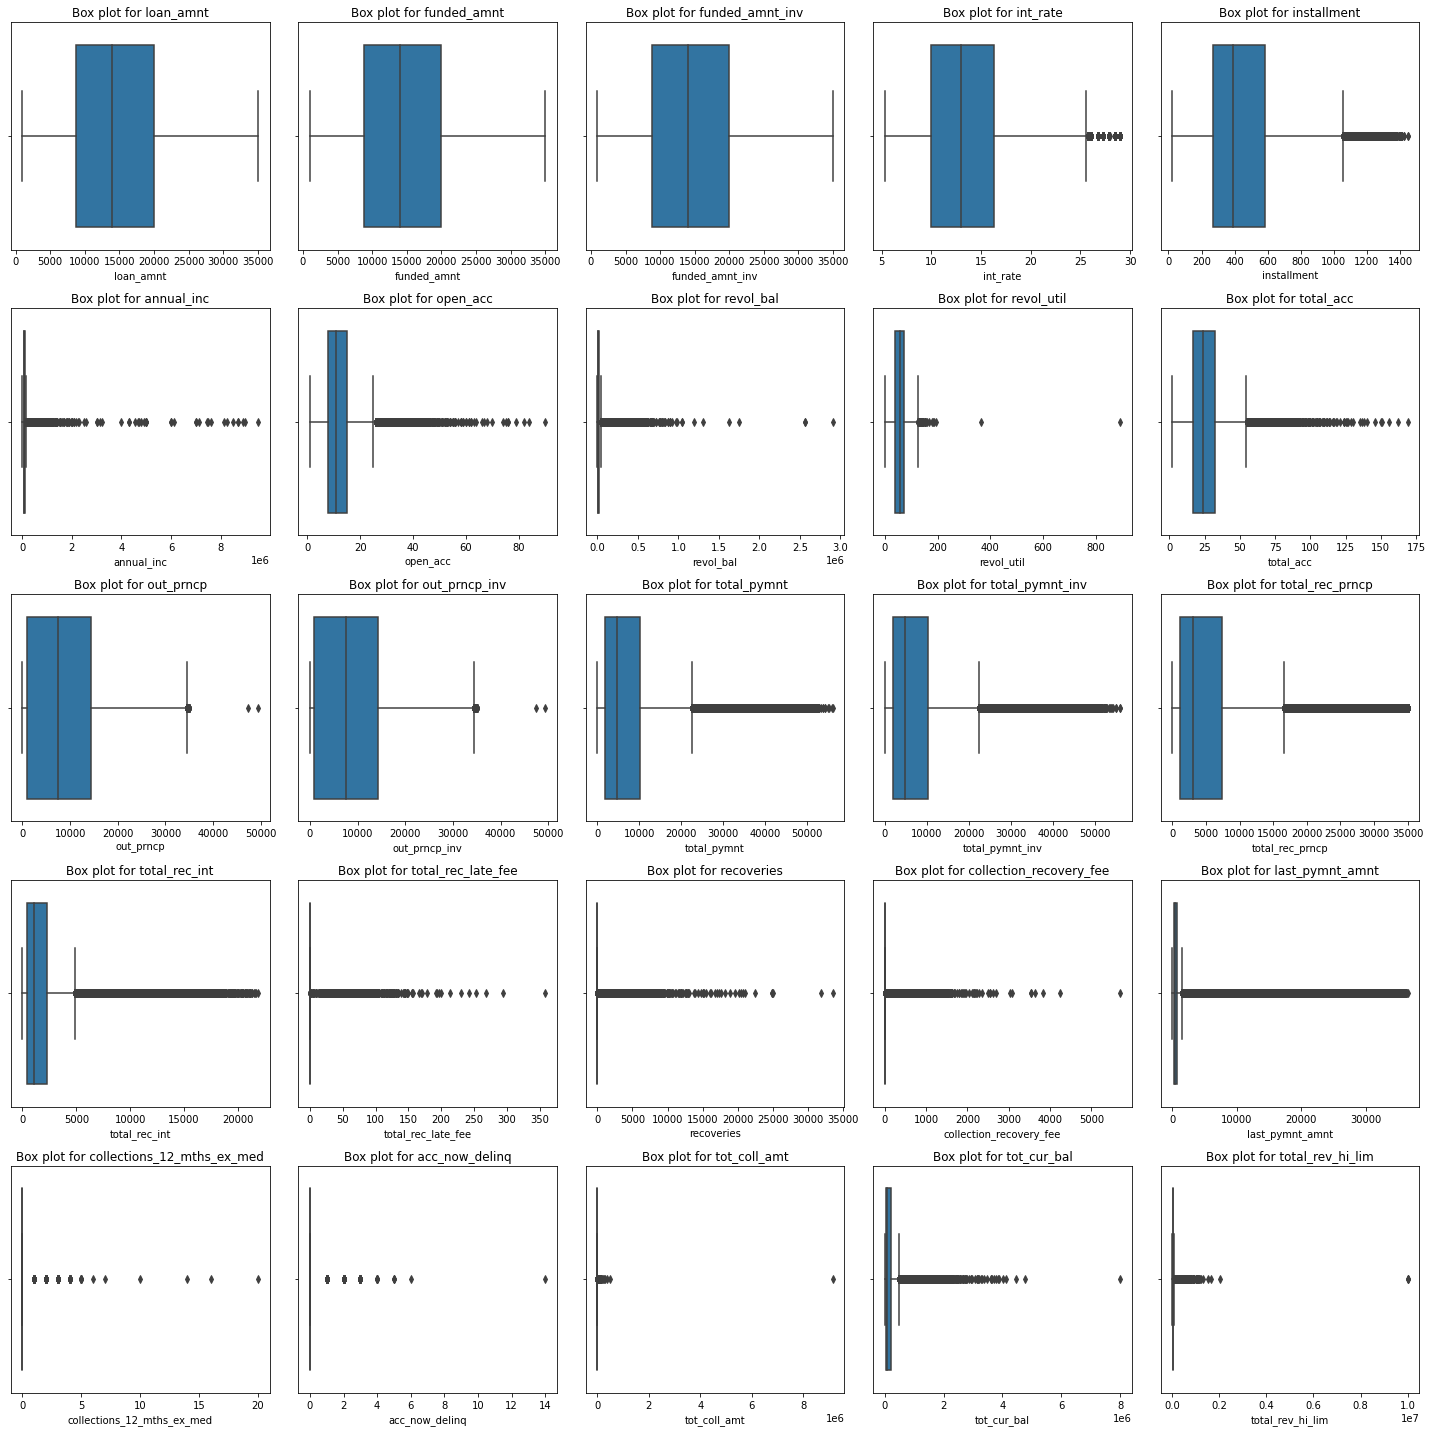

In [147]:
plot_box(num_cols)

In [151]:
def plot_dist(cols_list):
    plt.figure(figsize=[20,20])
    i=1
    for col in cols_list:
        plt.subplot(5,5,i)
        sns.distplot(df[col])
        plt.title("Box plot for {}".format(col))
        i+=1
        plt.tight_layout()
    plt.show()

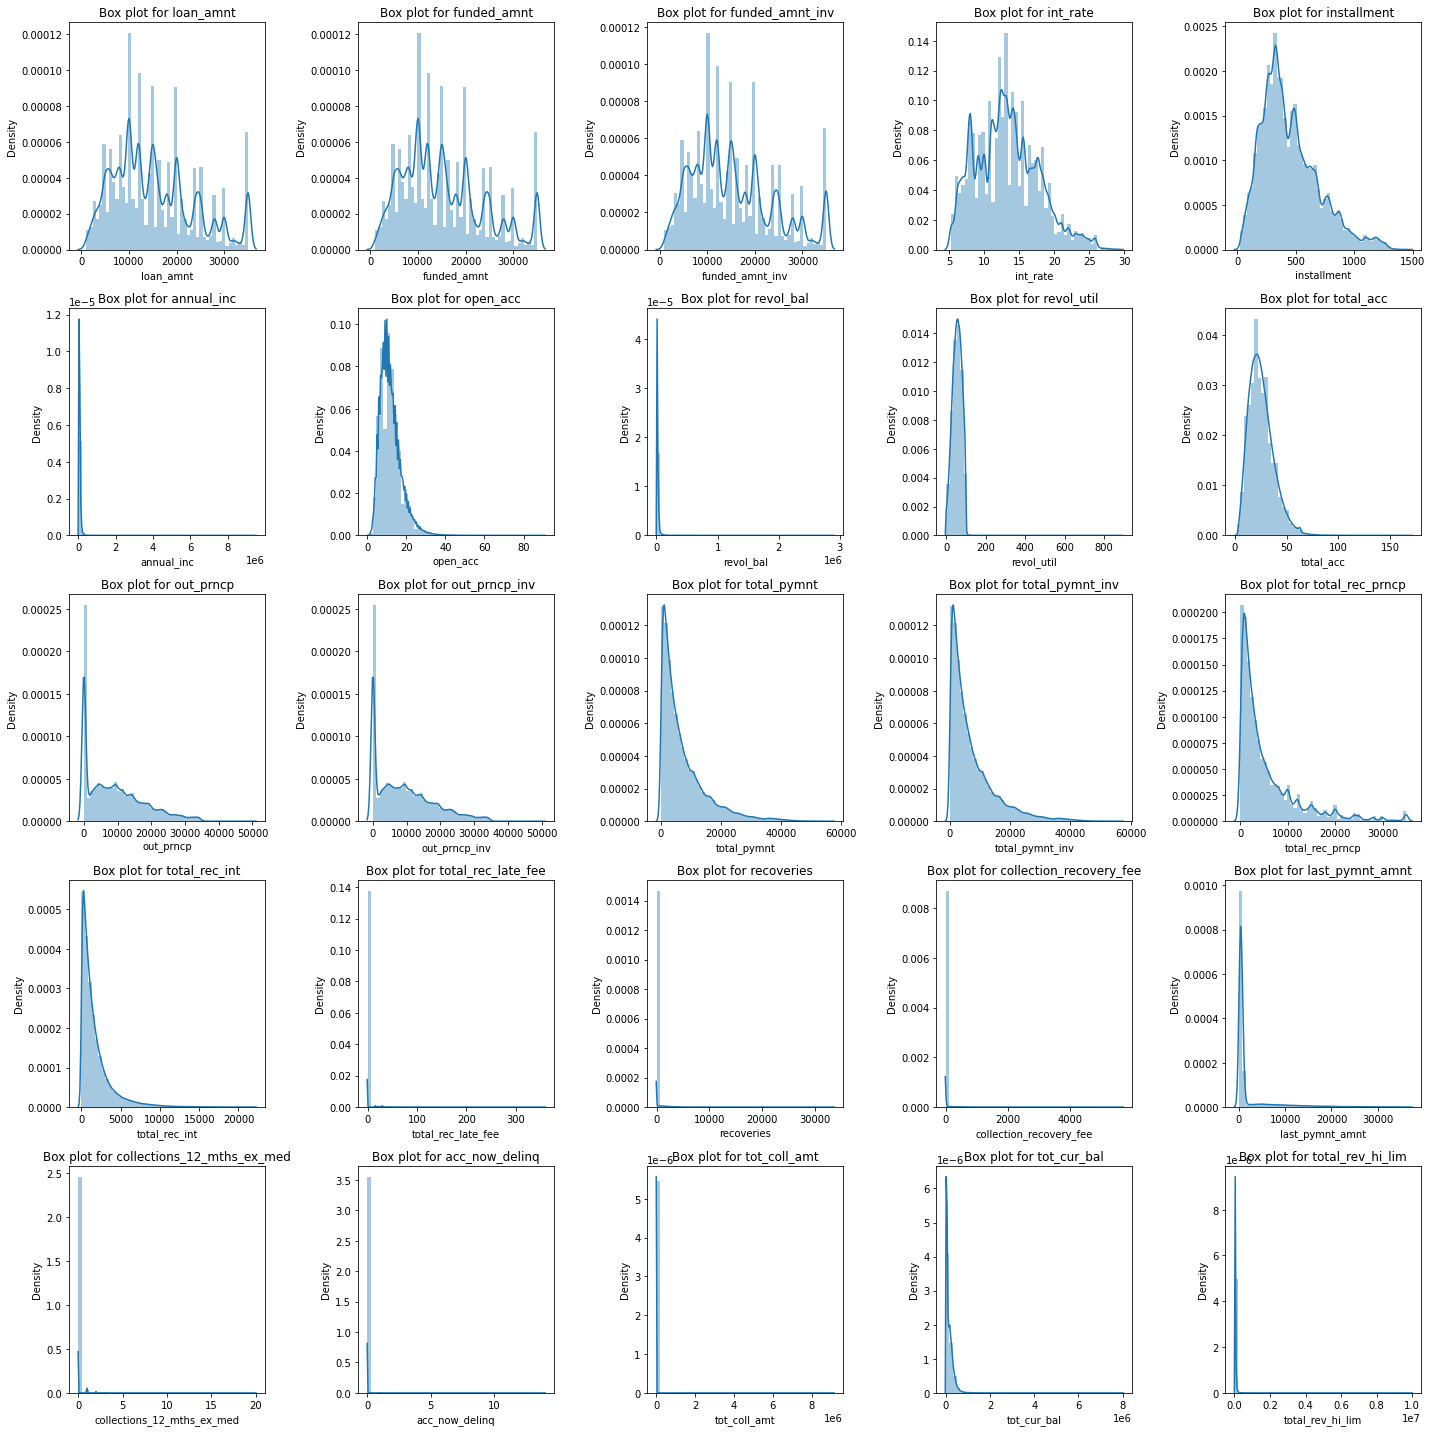

In [152]:
plot_dist(num_cols)